In [3]:
from google.colab import files

# Task 1 : csv 파일을 다운로드 받고 pandas를 이용하여 불러오기
data = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [239]:
# Task 1-1. pandas를 이용해 데이터 불러오기
import pandas as pd

csv_data = pd.read_csv("./owid-covid-data.csv", sep=",")

# Task 1-2.‘date’ 열의 데이터를 날짜 타입으로 변경하기
csv_data['date'] = pd.to_datetime(csv_data['date'])

# Task 1. 결과 출력
csv_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

In [240]:
# 결측치 처리 함수 (데이터를 List로 반환하고, 특정 row의 target1, 2 Column에 NaN 값이 존재하면 해당 row 제거)
def deleteMV(data, target1, target2):
  dates = []
  non_mv = []
  for a in zip(list(data[target1]), data[target2]):
    if pd.isna(a[0]) == False and pd.isna(a[1]) == False:
      dates.append(a[0])
      non_mv.append(a[1])
  return dates, non_mv

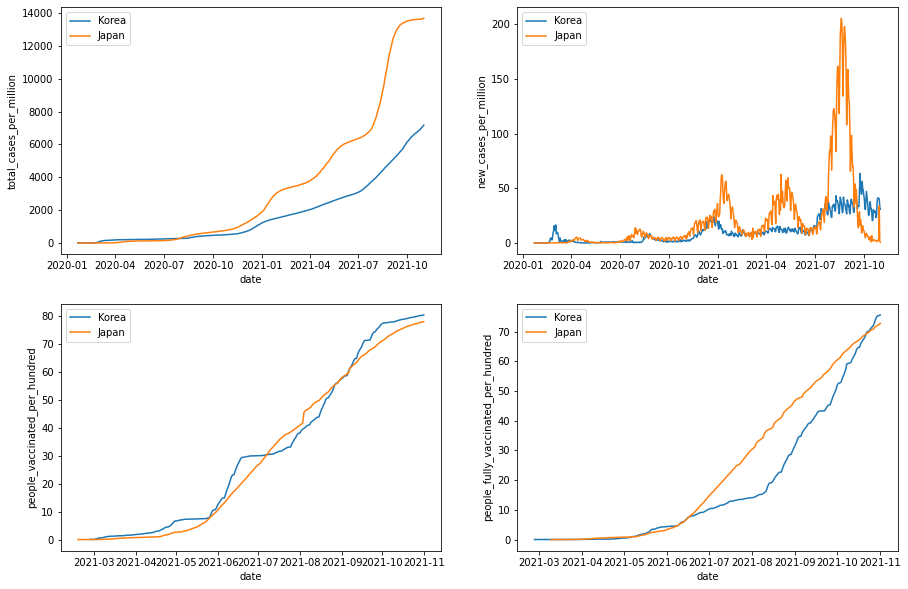

In [243]:
# Task 2. 한국(South Korea)과 일본(Japan)의 코로나 상황 비교 시각화하기
import matplotlib.pyplot as plt

# 한국, 일본 각 국가별 데이터 분리 저장
kor_data = csv_data.loc[csv_data['location'] == 'South Korea', :]
jpn_data = csv_data.loc[csv_data['location'] == 'Japan', :]

plt.figure(figsize=(15, 10))
# Task 2-1. 날짜별 확진자 비율 시각화
plt.subplot(2, 2, 1)
kor_dates, kor_non_mv = deleteMV(kor_data, "date", "total_cases_per_million")
jpn_dates, jpn_non_mv = deleteMV(jpn_data, "date", "total_cases_per_million")
plt.plot(kor_dates, kor_non_mv, label="Korea")
plt.plot(jpn_dates, jpn_non_mv, label="Japan")
plt.legend()
plt.xlabel("date")
plt.ylabel("total_cases_per_million")

# Task 2-2. 날짜별 신규 확진자 비율 시각화
plt.subplot(2, 2, 2)
kor_dates, kor_non_mv = deleteMV(kor_data, "date", "new_cases_per_million")
jpn_dates, jpn_non_mv = deleteMV(jpn_data, "date", "new_cases_per_million")
plt.plot(kor_dates, kor_non_mv, label="Korea")
plt.plot(jpn_dates, jpn_non_mv, label="Japan")
plt.legend()
plt.xlabel("date")
plt.ylabel("new_cases_per_million")

# Task 2-3. 날짜별 백신 접종자 비율 시각화
plt.subplot(2, 2, 3)
kor_dates, kor_non_mv = deleteMV(kor_data, "date", "people_vaccinated_per_hundred")
jpn_dates, jpn_non_mv = deleteMV(jpn_data, "date", "people_vaccinated_per_hundred")
plt.plot(kor_dates, kor_non_mv, label="Korea")
plt.plot(jpn_dates, jpn_non_mv, label="Japan")
plt.legend()
plt.xlabel("date")
plt.ylabel("people_vaccinated_per_hundred")

# Task 2-4. 날짜별 백신 접종 완료자 비율
plt.subplot(2, 2, 4)
kor_dates, kor_non_mv = deleteMV(kor_data, "date", "people_fully_vaccinated_per_hundred")
jpn_dates, jpn_non_mv = deleteMV(jpn_data, "date", "people_fully_vaccinated_per_hundred")
plt.plot(kor_dates, kor_non_mv, label="Korea")
plt.plot(jpn_dates, jpn_non_mv, label="Japan")
plt.legend()
plt.xlabel("date")
plt.ylabel("people_fully_vaccinated_per_hundred")

# Task 2. 결과 출력
plt.show()

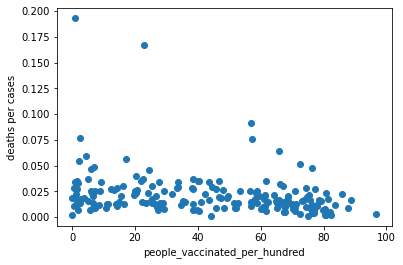

Pearson Correlation Coefficient: -0.2528239424290653


In [242]:
# Task 3. 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관관계 알아보기

# Task 3-1. Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기
task3_data = csv_data[["location", "date", "total_deaths_per_million", "total_cases_per_million", "people_vaccinated_per_hundred", "human_development_index"]]

# Task 3-2. 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max 활용)
recent_data = task3_data.groupby(task3_data["location"]).max()
recent_data_fixed = recent_data[["people_vaccinated_per_hundred", "total_deaths_per_million", "total_cases_per_million"]].dropna() # 결측치 제거

# Task 3-3. 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기
recent_x = recent_data_fixed["people_vaccinated_per_hundred"]
recent_y = recent_data_fixed["total_deaths_per_million"] / recent_data_fixed["total_cases_per_million"]

plt.scatter(recent_x, recent_y)
plt.xlabel("people_vaccinated_per_hundred")
plt.ylabel("deaths per cases")
plt.show()

# Task 3-4. 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기
def PCC(x, y):
  # 평균 조정
  x = x-x.mean()
  y = y-y.mean()
    
  # denom = |x||y|
  # |x| = (x ** 2).sum() ** 0.5, |y| = (y ** 2).sum() ** 0.5
  denom = ((x ** 2).sum() ** 0.5)*((y ** 2).sum() ** 0.5)
  if denom == 0:
    return 0

  # cos(x, y) = a dot b / |a||b|
  return (x*y).sum()/denom

print("Pearson Correlation Coefficient:", PCC(recent_x, recent_y))

Pearson Correlation Coefficient: 0.7250351729877785
w: 149.8710, b: -66.1221


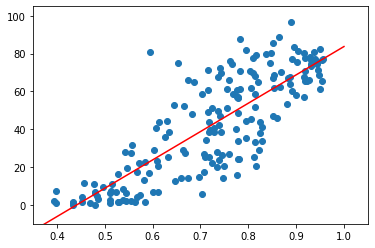

In [244]:
# Task 4. HDI 계수 (human_development_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계 알아보기

# Task 4-1. Task 3-2 에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기
print("Pearson Correlation Coefficient:", PCC(recent_data["human_development_index"], recent_data["people_vaccinated_per_hundred"]))

# Task 4-2. Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)
import torch

hdi = []
vac = []
recent_data_train = recent_data[["human_development_index", "people_vaccinated_per_hundred"]].dropna()
for h, v in zip(recent_data_train["human_development_index"], recent_data_train["people_vaccinated_per_hundred"]):
  hdi.append([h])
  vac.append([v])

train_x = torch.FloatTensor(hdi)
train_y = torch.FloatTensor(vac)

W = torch.zeros(1, 1)
b = torch.zeros(1, 1)

lr = 0.25

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypo = torch.mm(train_x, W) + b
  cost = torch.mean((hypo - train_y) ** 2)

  cost.backward()
  with torch.no_grad() as g:
    W = W - lr * W.grad
    b = b - lr * b.grad

print(f"w: {W.squeeze():.4f}, b: {b.squeeze():.4f}")

# Task 4-3. HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기
plt.scatter(recent_data["human_development_index"], recent_data["people_vaccinated_per_hundred"])

line = torch.FloatTensor([[0.0], [1.0]])
line_result = torch.mm(line, W) + b
plt.plot([0.0, 1.0], result.squeeze(), c="red")
plt.axis((0.35, 1.05, -10, 105)) # scatter plot이 X: 0.35~1.0, Y: 0~100에 모여있으므로 축 범위 조정

# Task 4. 결과 출력
plt.show()